# 1. 데이터 로드 및 전처리
---
- keras.datasets에서 불러올 수 있는 boston_housing 데이터셋을 활용

In [2]:
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [1]:
# keras.datasets 안에 boston_housing 데이터셋을 로드합니다.
from keras.datasets import boston_housing

(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

# 데이터셋의 크기를 확인합니다.
print(len(train_data))
print(len(test_data))

57026/57026 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
404
102


In [4]:
train_data[0]

array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
        91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
        18.72   ])

In [5]:
# 문제 1-1: 데이터셋의 전처리를 위해 표준화 작업을 수행합니다.
# 먼저 입력 데이터의 각 특성의 평균을 뺍니다.
mean = train_data.mean(axis=0)
train_data -= mean

# 평균을 뺀 입력 데이터에서 표준편차를 나눕니다.
# 데이터 특성의 중앙이 0에 가깝게 만들고, 표준편차가 1이 되게 만듭니다.
std = train_data.std(axis=0)
train_data /= std

# 테스트 데이터셋도 마찬가지로 평균을 빼고, 표준편차로 나눕니다.
test_data = (test_data - mean) / std

# 모델 구성 및 컴파일
---
- 주택 가격 예측을 위한 딥러닝 모델을 구성하고 컴파일합니다. Sequential() 함수를 이용한 Sequential API 방법으로 딥러닝 모델을 구성해 보세요.

In [6]:
# 문제 1-2: 주택 가격 예측을 위한 딥러닝 모델 구성 및 컴파일합니다.
# input_shape은 (train_data.shape[1], )으로 구성합니다.
# 회귀(예측)을 위한 모델이므로 loss를 mse, metrics를 mae로 사용합니다.
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Input(shape=(13, )))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1))
model.summary()

model.compile(loss='mse',
              optimizer='adam',
              metrics=['mae'])

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,121 (20.00 KB)

 Trainable params: 5,121 (20.00 KB)

 Non-trainable params: 0 (0.00 B)

# 모델 학습
---
- epochs와 batch size는 자유롭게 설정해 보세요. 모델 학습 후에는 모델 학습 결과를 시각화해 보세요.

In [18]:
# 문제 1-3: 예측을 위한 딥러닝 모델을 학습합니다.
history = model.fit(train_data, train_labels,
                    epochs=100,
                    batch_size=512,
                    validation_split=0.2)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - loss: 45.1303 - mae: 5.1327 - val_loss: 54.7006 - val_mae: 5.8405
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - loss: 44.0219 - mae: 5.0578 - val_loss: 53.3868 - val_mae: 5.7567
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - loss: 42.9574 - mae: 4.9849 - val_loss: 52.1200 - val_mae: 5.6761
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 41.9372 - mae: 4.9153 - val_loss: 50.9006 - val_mae: 5.5986
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - loss: 40.9618 - mae: 4.8486 - val_loss: 49.7260 - val_mae: 5.5218
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - loss: 40.0293 - mae: 4.7851 - val_loss: 48.5970 - val_mae: 5.4460
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - loss: 39.1381 - mae: 4.7230 - val_loss: 47.5130 - val_mae: 5.3715
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 38.2870 - mae: 4.6627 - val_loss: 46.4753 - val_mae: 5.3040
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step 

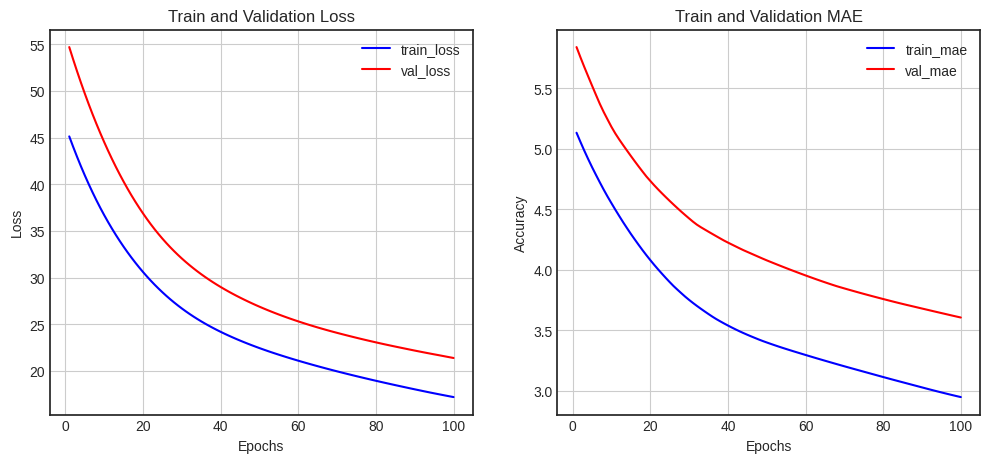

In [19]:
# 모델 학습 히스토리에서 loss, val_loss, mae, val_mae를 차트로 보여줍니다.
plt.style.use('seaborn-v0_8-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

mae = history_dict['mae']
val_mae = history_dict['val_mae']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, 'b-', label='train_mae')
ax2.plot(epochs, val_mae, 'r-', label='val_mae')
ax2.set_title('Train and Validation MAE')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

# 모델 평가
---
- 테스트 데이터를 가져와 모델 성능을 평가해 보겠습니다.


In [20]:
model.evaluate(test_data, test_labels)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 21.1594 - mae: 3.6371 


[24.81601905822754, 3.8215582370758057]

In [21]:
test_loss, test_mae = model.evaluate(test_data, test_labels)
print(f"Test Loss (MSE): {test_loss:.4f}")
print(f"Test MAE: {test_mae:.4f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 21.1594 - mae: 3.6371
Test Loss (MSE): 24.8160
Test MAE: 3.8216


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


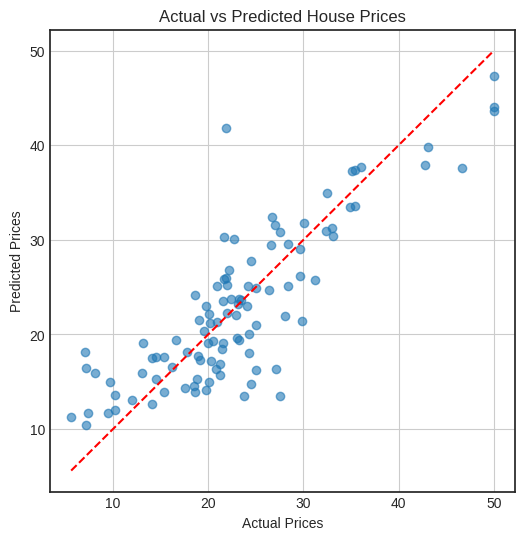

In [22]:
import matplotlib.pyplot as plt

# 예측
y_pred = model.predict(test_data).flatten()

# 시각화
plt.figure(figsize=(6, 6))
plt.scatter(test_labels, y_pred, alpha=0.6)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices')
plt.plot([test_labels.min(),test_labels.max()],
         [test_labels.min(), test_labels.max()],
         'r--')  # 기준선 (완벽 예측선)
plt.grid()
plt.show()